The Food101 dataset consists of 101 food categories, with a total of 101,000 images. Each class contains 750 training images and 250 manually reviewed test images.

This notebook facilitates the random sampling of 10% of the training and test data while ensuring that the selection is balanced across all food categories.

In [2]:
import torch
import pathlib
import torchvision

import torchvision.datasets as datasets
import torchvision.transforms as transforms


In [3]:
data_dir = pathlib.Path("../data")

We can get our food data from pytorch datasets

Food101 in torchvision.datasets - https://pytorch.org/vision/stable/generated/torchvision.datasets.Food101.html

In [4]:
train_data = datasets.Food101(
    root=data_dir,
    split="train",
    download=False
)

test_data = datasets.Food101(
    root = data_dir,
    split="test",
    download=False
)

In [5]:
train_data

Dataset Food101
    Number of datapoints: 75750
    Root location: ..\data
    split=train

In [6]:
test_data

Dataset Food101
    Number of datapoints: 25250
    Root location: ..\data
    split=test

In [7]:
class_names = train_data.classes
print("Number of classes: ",len(class_names))
class_names

Number of classes:  101


['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

panna_cotta


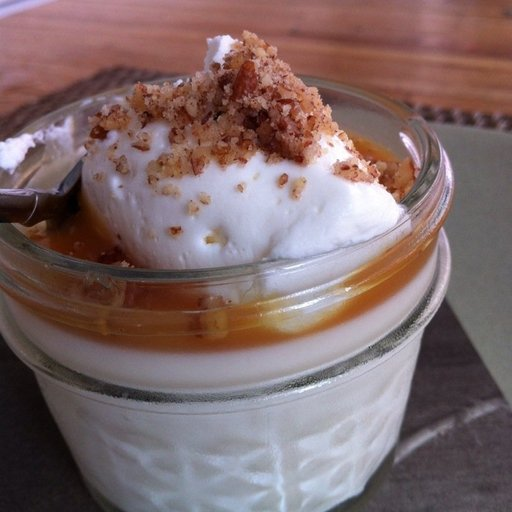

In [8]:
# lets view the sample
print(class_names[train_data[4500][1]])
train_data[4500][0]

In [9]:
import pathlib
import random

data_path = data_dir / "food-101" / "images"

def get_subset(image_path=data_path,
               data_splits=['train','test'],
               target_classes=class_names,
               n_per_category=[75,25],  # number of images per category
               seed=42):
    
    random.seed(seed)
    label_splits = {}

    for i,data_split in enumerate(data_splits):
        print(f"[Info] Creating Image Split for: {data_split}...")
        label_path = data_dir / "food-101" / "meta" / f"{data_split}.txt"
        
        with open(label_path, "r") as f:
            labels = [line.strip() for line in f.readlines()]
        
        category_dict = {}
        for label in labels:
            category = label.split("/")[0]
            if category in target_classes:
                category_dict.setdefault(category, []).append(label)
        
        # For each category, randomly sample n_per_category images
        sampled_images = []
        for category, images in category_dict.items():
            if len(images) < n_per_category[i]:
                print(f"[Warning] Category '{category}' has less than {n_per_category[i]} images.")
                sample = images  # take all if not enough
            else:
                sample = random.sample(images, n_per_category[i])
            sampled_images.extend(sample)
        
        # Convert each sampled label to its corresponding image path
        image_paths = [pathlib.Path(str(image_path / sample_image) + ".jpg") for sample_image in sampled_images]
        label_splits[data_split] = image_paths

    return label_splits

# Example usage:
label_splits = get_subset(n_per_category=[75,25])
print(label_splits['train'][0:10])


[Info] Creating Image Split for: train...
[Info] Creating Image Split for: test...
[WindowsPath('../data/food-101/images/apple_pie/604375.jpg'), WindowsPath('../data/food-101/images/apple_pie/1544507.jpg'), WindowsPath('../data/food-101/images/apple_pie/1147371.jpg'), WindowsPath('../data/food-101/images/apple_pie/2439188.jpg'), WindowsPath('../data/food-101/images/apple_pie/2288697.jpg'), WindowsPath('../data/food-101/images/apple_pie/2151461.jpg'), WindowsPath('../data/food-101/images/apple_pie/1710288.jpg'), WindowsPath('../data/food-101/images/apple_pie/1481550.jpg'), WindowsPath('../data/food-101/images/apple_pie/770439.jpg'), WindowsPath('../data/food-101/images/apple_pie/3594414.jpg')]


In [10]:
from collections import defaultdict

food_counts = defaultdict(int)

# Iterate over the dataset
for path in label_splits['train']:  
    food_category = path.parts[-2]  # Extract category name from path
    food_counts[food_category] += 1  

food_counts = dict(food_counts)

print(sorted(food_counts.items(), key=lambda x: x[1]))  # Displaying categories with counts to check


[('apple_pie', 75), ('baby_back_ribs', 75), ('baklava', 75), ('beef_carpaccio', 75), ('beef_tartare', 75), ('beet_salad', 75), ('beignets', 75), ('bibimbap', 75), ('bread_pudding', 75), ('breakfast_burrito', 75), ('bruschetta', 75), ('caesar_salad', 75), ('cannoli', 75), ('caprese_salad', 75), ('carrot_cake', 75), ('ceviche', 75), ('cheesecake', 75), ('cheese_plate', 75), ('chicken_curry', 75), ('chicken_quesadilla', 75), ('chicken_wings', 75), ('chocolate_cake', 75), ('chocolate_mousse', 75), ('churros', 75), ('clam_chowder', 75), ('club_sandwich', 75), ('crab_cakes', 75), ('creme_brulee', 75), ('croque_madame', 75), ('cup_cakes', 75), ('deviled_eggs', 75), ('donuts', 75), ('dumplings', 75), ('edamame', 75), ('eggs_benedict', 75), ('escargots', 75), ('falafel', 75), ('filet_mignon', 75), ('fish_and_chips', 75), ('foie_gras', 75), ('french_fries', 75), ('french_onion_soup', 75), ('french_toast', 75), ('fried_calamari', 75), ('fried_rice', 75), ('frozen_yogurt', 75), ('garlic_bread', 75

Moving the random samples to dedicated folders

In [11]:
# Create target directory path

target_dir_name = f"../dataset/MiniFood101"
print(f"Creating directory: '{target_dir_name}'")

# Setup the directories
target_dir = pathlib.Path(target_dir_name)

# Make the directories
target_dir.mkdir(parents=True, exist_ok=True)

Creating directory: '../dataset/MiniFood101'


In [12]:
import shutil

for image_split in label_splits.keys():
    for image_path in label_splits[str(image_split)]:
        dest_dir = target_dir / image_split / image_path.parent.stem / image_path.name
        if not dest_dir.parent.is_dir():
            dest_dir.parent.mkdir(parents=True, exist_ok=True)
        print(f"[INFO] Copying {image_path} to {dest_dir}...")
        shutil.copy2(image_path, dest_dir)

[INFO] Copying ..\data\food-101\images\apple_pie\604375.jpg to ..\dataset\MiniFood101\train\apple_pie\604375.jpg...
[INFO] Copying ..\data\food-101\images\apple_pie\1544507.jpg to ..\dataset\MiniFood101\train\apple_pie\1544507.jpg...
[INFO] Copying ..\data\food-101\images\apple_pie\1147371.jpg to ..\dataset\MiniFood101\train\apple_pie\1147371.jpg...
[INFO] Copying ..\data\food-101\images\apple_pie\2439188.jpg to ..\dataset\MiniFood101\train\apple_pie\2439188.jpg...
[INFO] Copying ..\data\food-101\images\apple_pie\2288697.jpg to ..\dataset\MiniFood101\train\apple_pie\2288697.jpg...
[INFO] Copying ..\data\food-101\images\apple_pie\2151461.jpg to ..\dataset\MiniFood101\train\apple_pie\2151461.jpg...
[INFO] Copying ..\data\food-101\images\apple_pie\1710288.jpg to ..\dataset\MiniFood101\train\apple_pie\1710288.jpg...
[INFO] Copying ..\data\food-101\images\apple_pie\1481550.jpg to ..\dataset\MiniFood101\train\apple_pie\1481550.jpg...
[INFO] Copying ..\data\food-101\images\apple_pie\770439.jp

In [13]:
import os

# Summary of our Datasets Sampled from Food-101

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

print(target_dir)
walk_through_dir(target_dir)

..\dataset\MiniFood101
There are 2 directories and 0 images in '..\dataset\MiniFood101'.
There are 101 directories and 0 images in '..\dataset\MiniFood101\test'.
There are 0 directories and 25 images in '..\dataset\MiniFood101\test\apple_pie'.
There are 0 directories and 25 images in '..\dataset\MiniFood101\test\baby_back_ribs'.
There are 0 directories and 25 images in '..\dataset\MiniFood101\test\baklava'.
There are 0 directories and 25 images in '..\dataset\MiniFood101\test\beef_carpaccio'.
There are 0 directories and 25 images in '..\dataset\MiniFood101\test\beef_tartare'.
There are 0 directories and 25 images in '..\dataset\MiniFood101\test\beet_salad'.
There are 0 directories and 25 images in '..\dataset\MiniFood101\test\beignets'.
There are 0 directories and 25 images in '..\dataset\MiniFood101\test\bibimbap'.
There are 0 directories and 25 images in '..\dataset\MiniFood101\test\bread_pudding'.
There are 0 directories and 25 images in '..\dataset\MiniFood101\test\breakfast_burrit

In [14]:
# setting up train and testing paths
train_dir = r'../dataset/MiniFood101/train'
test_dir = r'../dataset/MiniFood101/test'
train_dir,test_dir

('../dataset/MiniFood101/train', '../dataset/MiniFood101/test')

Random Image path selected is:  ..\dataset\MiniFood101\test\cheesecake\2317205.jpg


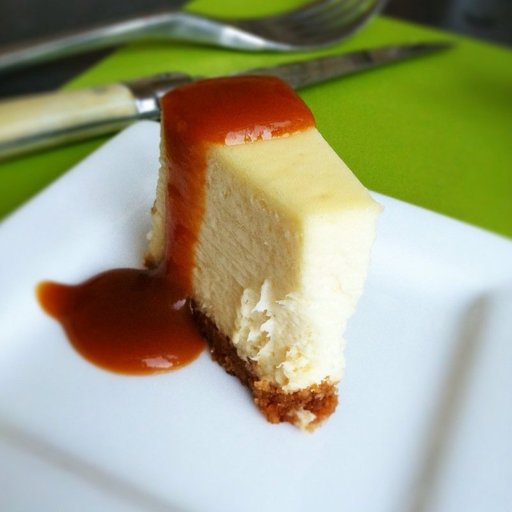

In [21]:
import random
from PIL import Image

# random.seed(42)

# getting all image paths
image_path_list = list(target_dir.glob("*/*/*.jpg"))

# pick a random image and plot it
random_image_path = random.choice(image_path_list)
print("Random Image path selected is: ",random_image_path)

image_class = random_image_path.parent.stem
image_class

img = Image.open(random_image_path)
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

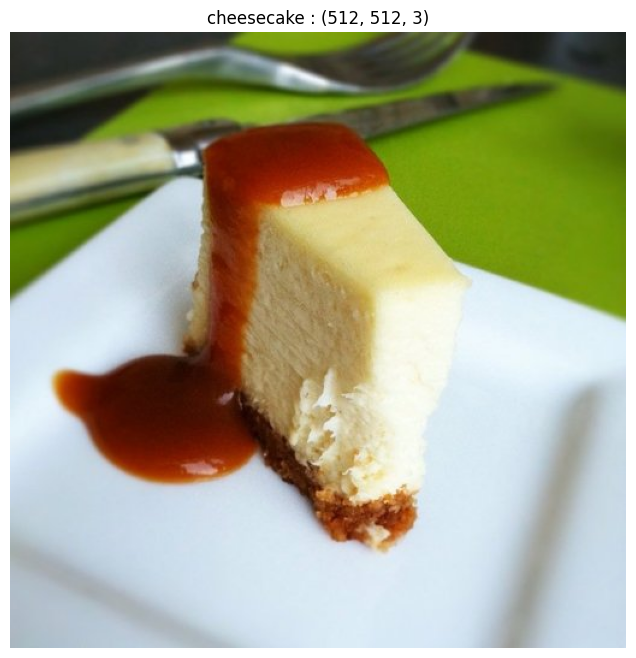

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# turn the image into array
img_as_array = np.asarray(img)

plt.figure(figsize=(12,8))
plt.imshow(img)
plt.title(f"{image_class} : {img_as_array.shape}")
plt.axis('off')

If we see the color channel (RGB) is present in the last dimension under PIL format, but pytorch accepts color channel in 0th dimension

In [20]:
img_as_array.shape

(287, 512, 3)